## Ensemble Techniques Project - VGK_Without OutlierRemoval

### Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Domain:
Banking

### Context:
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

### Attribute Information:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical:'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11. month: last contact month of year (categorical: 'jan', 'feb','mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric).
    - Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. target: has the client subscribed a term deposit? (binary:"yes","no")

### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using an Ensemble Model
- Comparing model perfomances

### Objective:
The classification goal is to predict if the client will subscribe (yes/no) aterm deposit (variable y).

#### Ref ::
https://activewizards.com/blog/top-9-data-science-use-cases-in-banking/
https://thefinancialbrand.com/71350/ai-machine-learning-analytics-marketing-banking-trends/

### 1. Import the necessary libraries

In [1]:
# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

### 2. Read the data as a data frame

In [2]:
# reading the CSV file into pandas dataframe
bank_df = pd.read_csv("bank-full.csv")

In [3]:
# Check top few records to get a feel of the data structure
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### 3. Perform basic EDA which should include the following and print out your insights at every step.

#### a. Shape of the data

In [4]:
bank_df.shape

(45211, 17)

#### b. Data type of each attribute

In [5]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
#convert to numbers
bank_df['Target'] = bank_df['Target'].map({'yes': 1, 'no': 0})

In [7]:
bank_df['default'] = bank_df['default'].map({'yes': 1, 'no': 0})

In [8]:
bank_df['housing'] = bank_df['housing'].map({'yes': 1, 'no': 0})

In [9]:
bank_df['loan'] = bank_df['loan'].map({'yes': 1, 'no': 0})

In [10]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int64
dtype: object

In [21]:
first_type_dict = {'age':'float64','job':'category','marital':'category','education':'category','default':'float64','balance':'float64','housing':'float64','loan':'float64','contact':'category','day':'category','month':'category','duration':'float64','campaign':'float64','pdays':'float64','previous':'float64','poutcome':'category','Target':'bool'}
bank_df = bank_df.astype(first_type_dict)

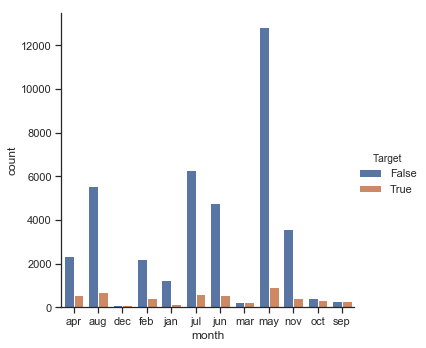

In [12]:
#plot month freq
sns.set(style="ticks", color_codes=True)
sns.catplot(x='month',hue='Target', kind="count", data=bank_df)

### Looks like there is some impact of month on target (0/1) distribution.. Sep, Mar, oct seems good months

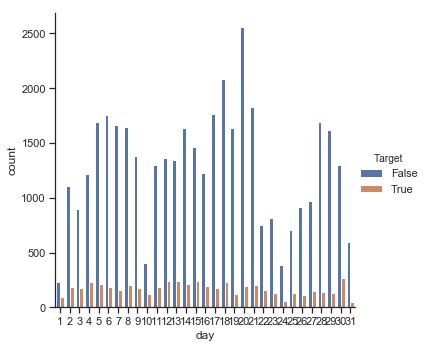

In [13]:
#plot target against day
#plot month freq
sns.set(style="ticks", color_codes=True)
sns.catplot(x='day',hue='Target', kind="count", data=bank_df)

In [14]:
# job, marital, education, contact, poutcome, month, day are categorical, lets one hot them

bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,0.0,2143.0,1.0,0.0,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,False
1,44.0,technician,single,secondary,0.0,29.0,1.0,0.0,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,False
2,33.0,entrepreneur,married,secondary,0.0,2.0,1.0,1.0,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,False
3,47.0,blue-collar,married,unknown,0.0,1506.0,1.0,0.0,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,False
4,33.0,unknown,single,unknown,0.0,1.0,0.0,0.0,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,False
5,35.0,management,married,tertiary,0.0,231.0,1.0,0.0,unknown,5,may,139.0,1.0,-1.0,0.0,unknown,False
6,28.0,management,single,tertiary,0.0,447.0,1.0,1.0,unknown,5,may,217.0,1.0,-1.0,0.0,unknown,False
7,42.0,entrepreneur,divorced,tertiary,1.0,2.0,1.0,0.0,unknown,5,may,380.0,1.0,-1.0,0.0,unknown,False
8,58.0,retired,married,primary,0.0,121.0,1.0,0.0,unknown,5,may,50.0,1.0,-1.0,0.0,unknown,False
9,43.0,technician,single,secondary,0.0,593.0,1.0,0.0,unknown,5,may,55.0,1.0,-1.0,0.0,unknown,False


#### c. Checking the presence of missing values

In [15]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null float64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null float64
balance      45211 non-null float64
housing      45211 non-null float64
loan         45211 non-null float64
contact      45211 non-null category
day          45211 non-null category
month        45211 non-null category
duration     45211 non-null float64
campaign     45211 non-null float64
pdays        45211 non-null float64
previous     45211 non-null float64
poutcome     45211 non-null category
Target       45211 non-null bool
dtypes: bool(1), category(7), float64(9)
memory usage: 3.5 MB


#### d. 5 point summary of numerical attributes

In [16]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


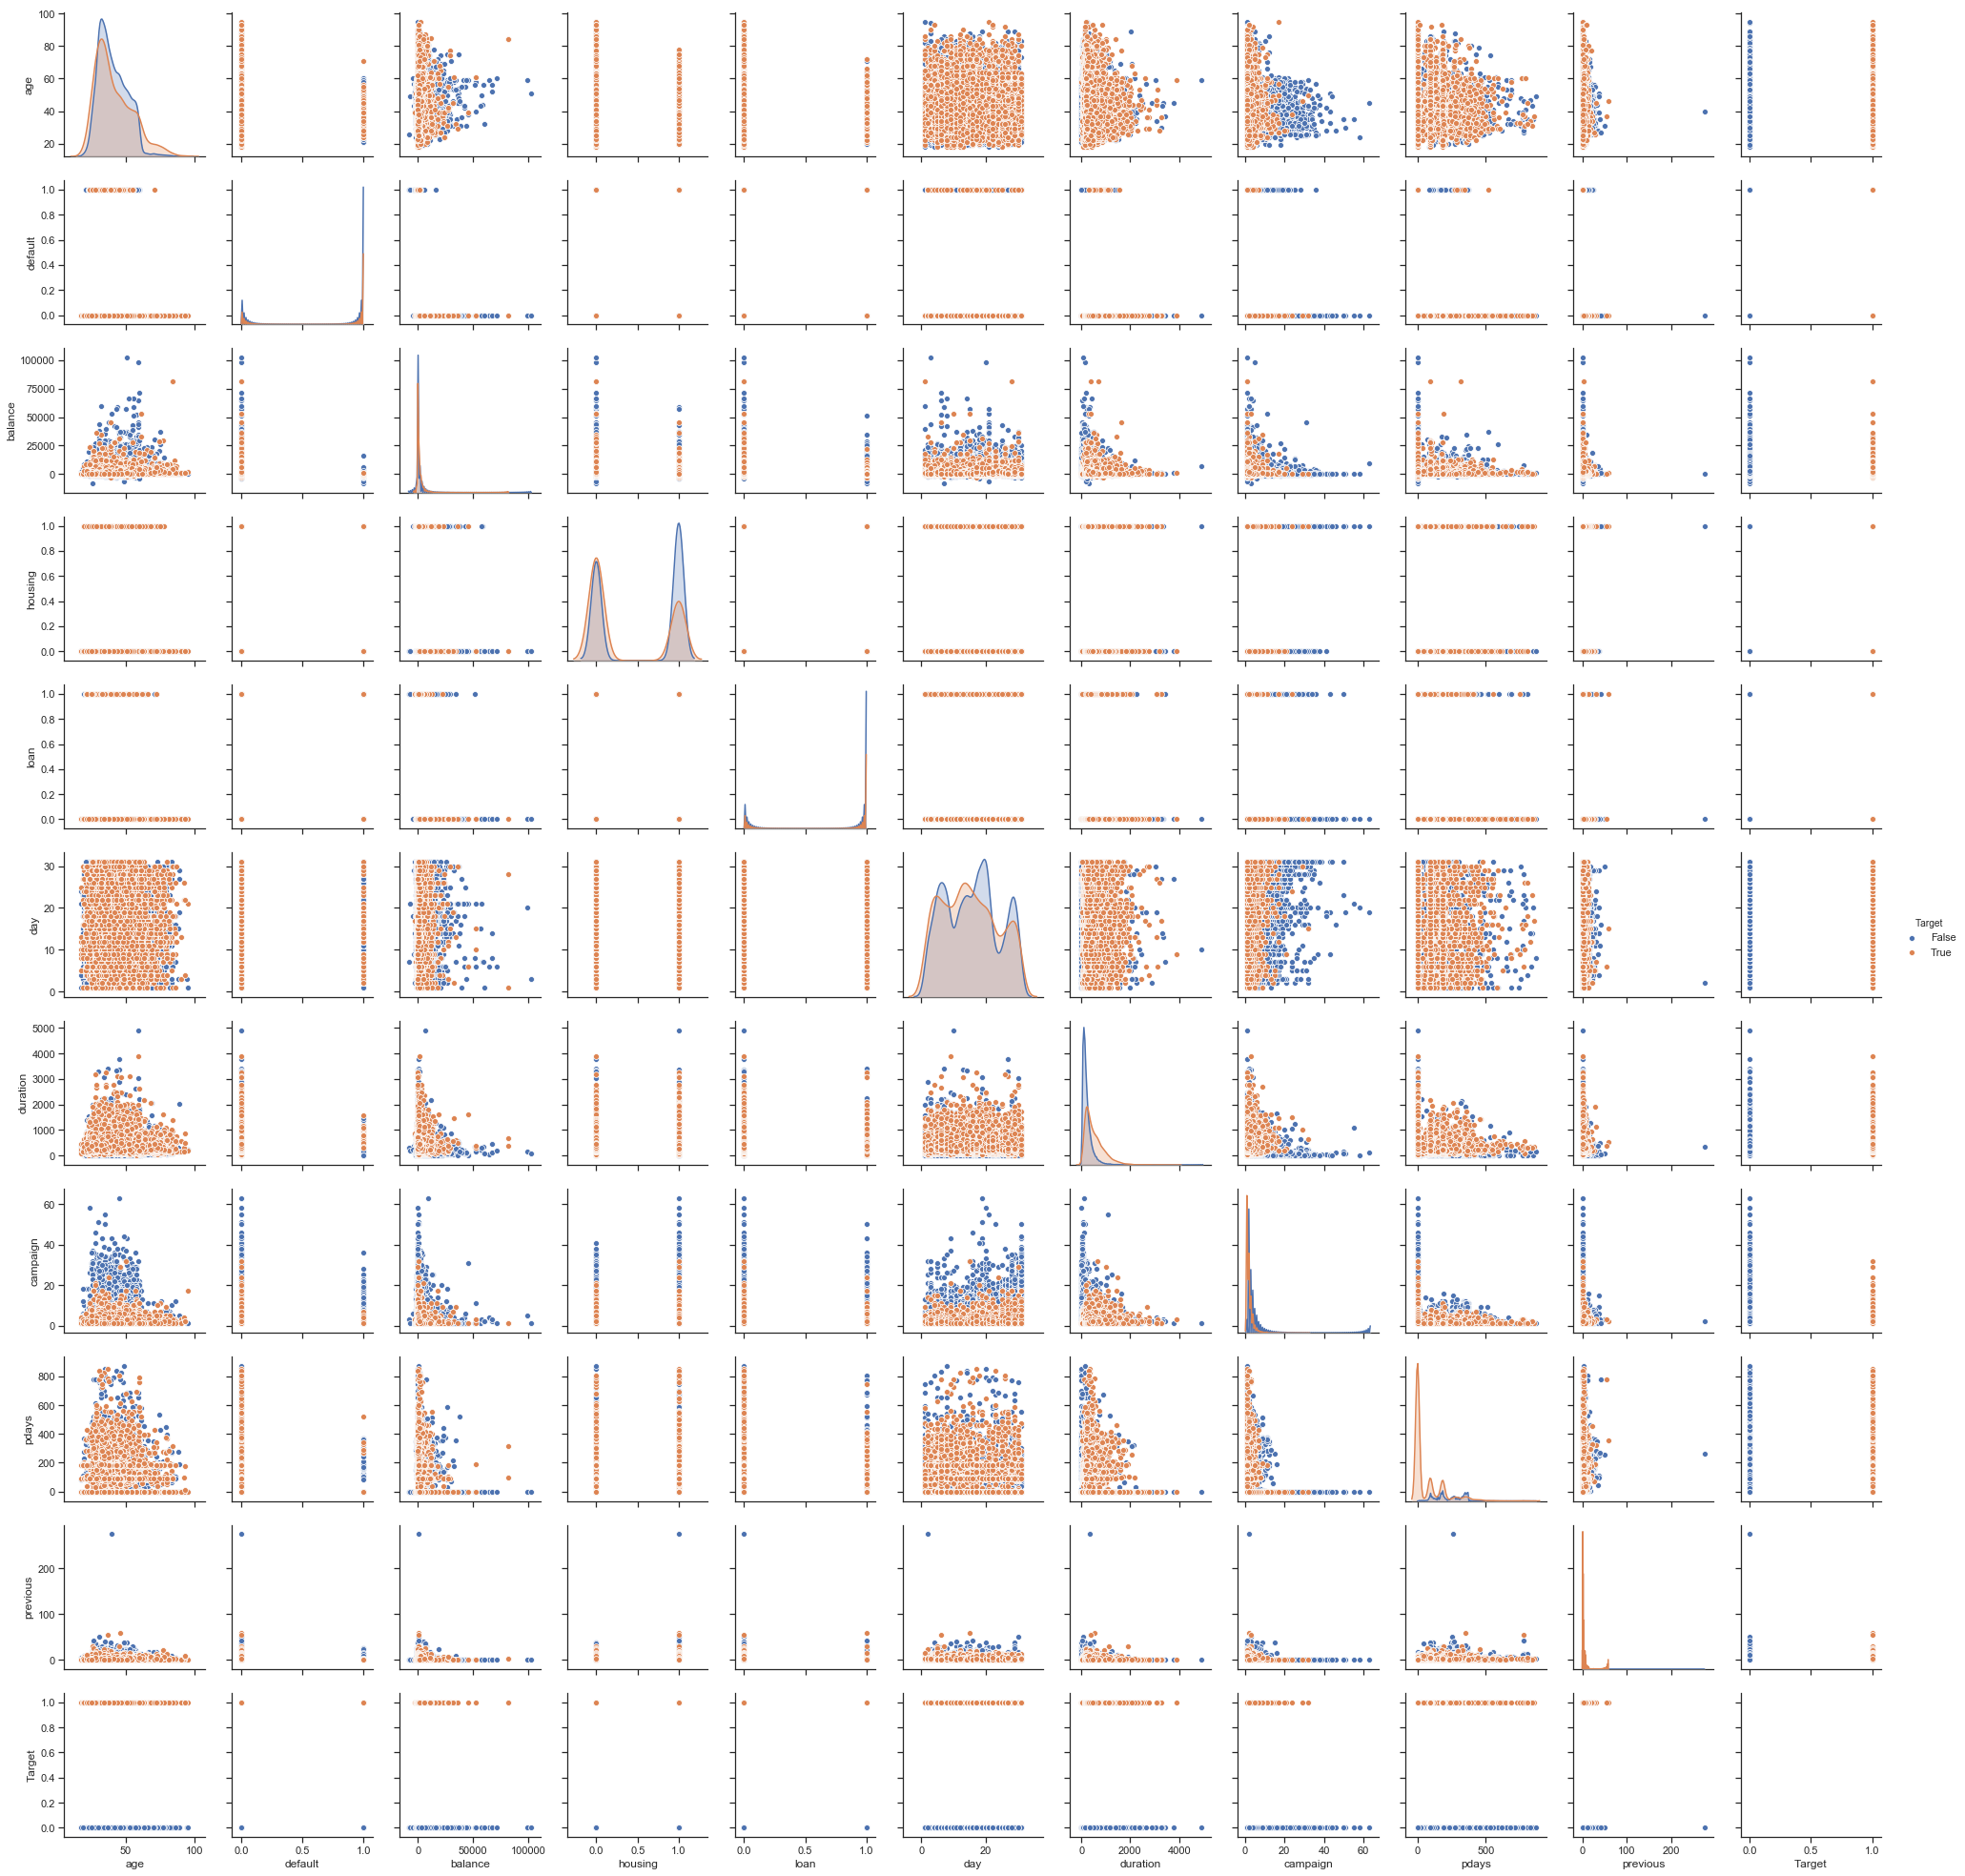

In [17]:
#just want to sns pair plot before all treatment
sns.pairplot(bank_df, hue="Target")

#### e. Checking the presence of outliers

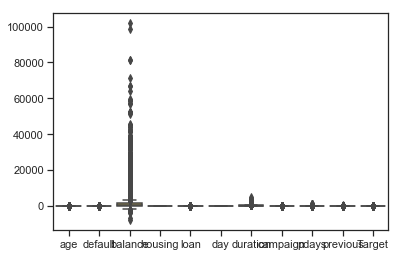

In [18]:
sns.boxplot(data=bank_df)

In [19]:
#just check outcomes for skew - looks like there is some skew
bank_df.groupby(['Target']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
False,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
True,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


### Ratio  of 0 : 1 == 0.8830151954170445: 0.1169848045829555 (0.883 : 0.117)

In [20]:
bank_df.corr()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,0.001203,-0.032855,0.454820,1.000000,0.093236
Target,0.025155,-0.022419,0.052838,-0.139173,-0.068185,0.394521,-0.073172,0.103621,0.093236,1.000000


In [22]:
# i will just zscore it and box plot?
#from scipy.stats import zscore

#bank_df_num_cols = bank_df.select_dtypes(include=[np.number]).columns
#print(bank_df_num_cols)

In [23]:
#We only take age, balance, duration, campaign, pdays, previous
#bank_df_num_cols=['age', 'balance', 'duration','campaign', 'pdays', 'previous']
#print(bank_df_num_cols)

In [24]:
#bank_df[bank_df_num_cols] = bank_df[bank_df_num_cols].apply(zscore)
bank_df_z = bank_df.copy()
#bank_df_z[bank_df_num_cols] = bank_df_z[bank_df_num_cols].apply(zscore)
#sns.boxplot(data=bank_df_z[bank_df_num_cols])

In [25]:
#bank_df_z.dtypes

### 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

In [26]:
#remove outliers
#from scipy import stats
#trimmed_bank_ndarray = stats.trimboth(bank_df_z, 0.01)

In [27]:
#trimmed_bank_ndarray.shape

In [28]:
#bank_df_z_outlier_treated = bank_df_z.copy()

In [29]:
#bank_df_z_outlier_treated.head(10)

In [30]:
#sns.boxplot(data=bank_df_z_outlier_treated[bank_df_num_cols])

In [31]:
#bank_df_z_outlier_treated.dtypes

In [32]:
#type_dict = {'age':'float64','job':'object','marital':'object','education':'object','default':'int64','balance':'float64','housing':'int64','loan':'int64','contact':'object','day':'int64','month':'object','duration':'float64','campaign':'float64','pdays':'float64','previous':'float64','poutcome':'object','Target':'int64'}
#type_dict = {'age':'float64','job':'category','marital':'category','education':'category','default':'bool','balance':'float64','housing':'float64','loan':'float64','contact':'category','day':'category','month':'category','duration':'float64','campaign':'float64','pdays':'float64','previous':'float64','poutcome':'category','Target':'bool'}
#bank_df_z_outlier_treated = bank_df_z_outlier_treated.astype(dtype=type_dict)

In [33]:
#bank_df_z_outlier_treated.dtypes

In [34]:
bank_df_conv = bank_df_z.copy()

In [35]:
bank_df_conv.dtypes

age           float64
job          category
marital      category
education    category
default       float64
balance       float64
housing       float64
loan          float64
contact      category
day          category
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
Target           bool
dtype: object

In [36]:
bank_df_conv.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,0.0,2143.0,1.0,0.0,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,False
1,44.0,technician,single,secondary,0.0,29.0,1.0,0.0,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,False
2,33.0,entrepreneur,married,secondary,0.0,2.0,1.0,1.0,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,False
3,47.0,blue-collar,married,unknown,0.0,1506.0,1.0,0.0,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,False
4,33.0,unknown,single,unknown,0.0,1.0,0.0,0.0,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,False
5,35.0,management,married,tertiary,0.0,231.0,1.0,0.0,unknown,5,may,139.0,1.0,-1.0,0.0,unknown,False
6,28.0,management,single,tertiary,0.0,447.0,1.0,1.0,unknown,5,may,217.0,1.0,-1.0,0.0,unknown,False
7,42.0,entrepreneur,divorced,tertiary,1.0,2.0,1.0,0.0,unknown,5,may,380.0,1.0,-1.0,0.0,unknown,False
8,58.0,retired,married,primary,0.0,121.0,1.0,0.0,unknown,5,may,50.0,1.0,-1.0,0.0,unknown,False
9,43.0,technician,single,secondary,0.0,593.0,1.0,0.0,unknown,5,may,55.0,1.0,-1.0,0.0,unknown,False


In [37]:
#src :: https://stackoverflow.com/a/37293283
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [38]:
#one hot encode job, marital, education, poutcome, education, contact --
#bank_df_onehot = pd.get_dummies(bank_df_conv, columns=['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome'], drop_first=False)

#drop Day & Month
#bank_df_conv_drop = bank_df_conv.drop(['day'], axis = 1) 
#bank_df_conv_drop = bank_df_conv_drop.drop(['month'], axis = 1) 
#bank_df_onehot = pd.get_dummies(bank_df_conv_drop, columns=['job', 'marital', 'education', 'contact', 'poutcome', 'month'], drop_first=False)

#for col in ['job', 'marital', 'education', 'contact', 'day', 'month', 'poutcome']:
#    bank_df[col] = bank_df[col].astype('category')
#bank_df_onehot.head(10)

bank_df_conv_encoded = dummyEncode(bank_df_conv)
bank_df_conv_encoded.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,4,1,2,0.0,2143.0,1.0,0.0,2,4,8,261.0,1.0,-1.0,0.0,3,False
1,44.0,9,2,1,0.0,29.0,1.0,0.0,2,4,8,151.0,1.0,-1.0,0.0,3,False
2,33.0,2,1,1,0.0,2.0,1.0,1.0,2,4,8,76.0,1.0,-1.0,0.0,3,False
3,47.0,1,1,3,0.0,1506.0,1.0,0.0,2,4,8,92.0,1.0,-1.0,0.0,3,False
4,33.0,11,2,3,0.0,1.0,0.0,0.0,2,4,8,198.0,1.0,-1.0,0.0,3,False
5,35.0,4,1,2,0.0,231.0,1.0,0.0,2,4,8,139.0,1.0,-1.0,0.0,3,False
6,28.0,4,2,2,0.0,447.0,1.0,1.0,2,4,8,217.0,1.0,-1.0,0.0,3,False
7,42.0,2,0,2,1.0,2.0,1.0,0.0,2,4,8,380.0,1.0,-1.0,0.0,3,False
8,58.0,5,1,0,0.0,121.0,1.0,0.0,2,4,8,50.0,1.0,-1.0,0.0,3,False
9,43.0,9,2,1,0.0,593.0,1.0,0.0,2,4,8,55.0,1.0,-1.0,0.0,3,False


In [39]:
bank_df_conv_encoded.dtypes

age          float64
job            int32
marital        int32
education      int32
default      float64
balance      float64
housing      float64
loan         float64
contact        int32
day            int64
month          int32
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome       int32
Target          bool
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


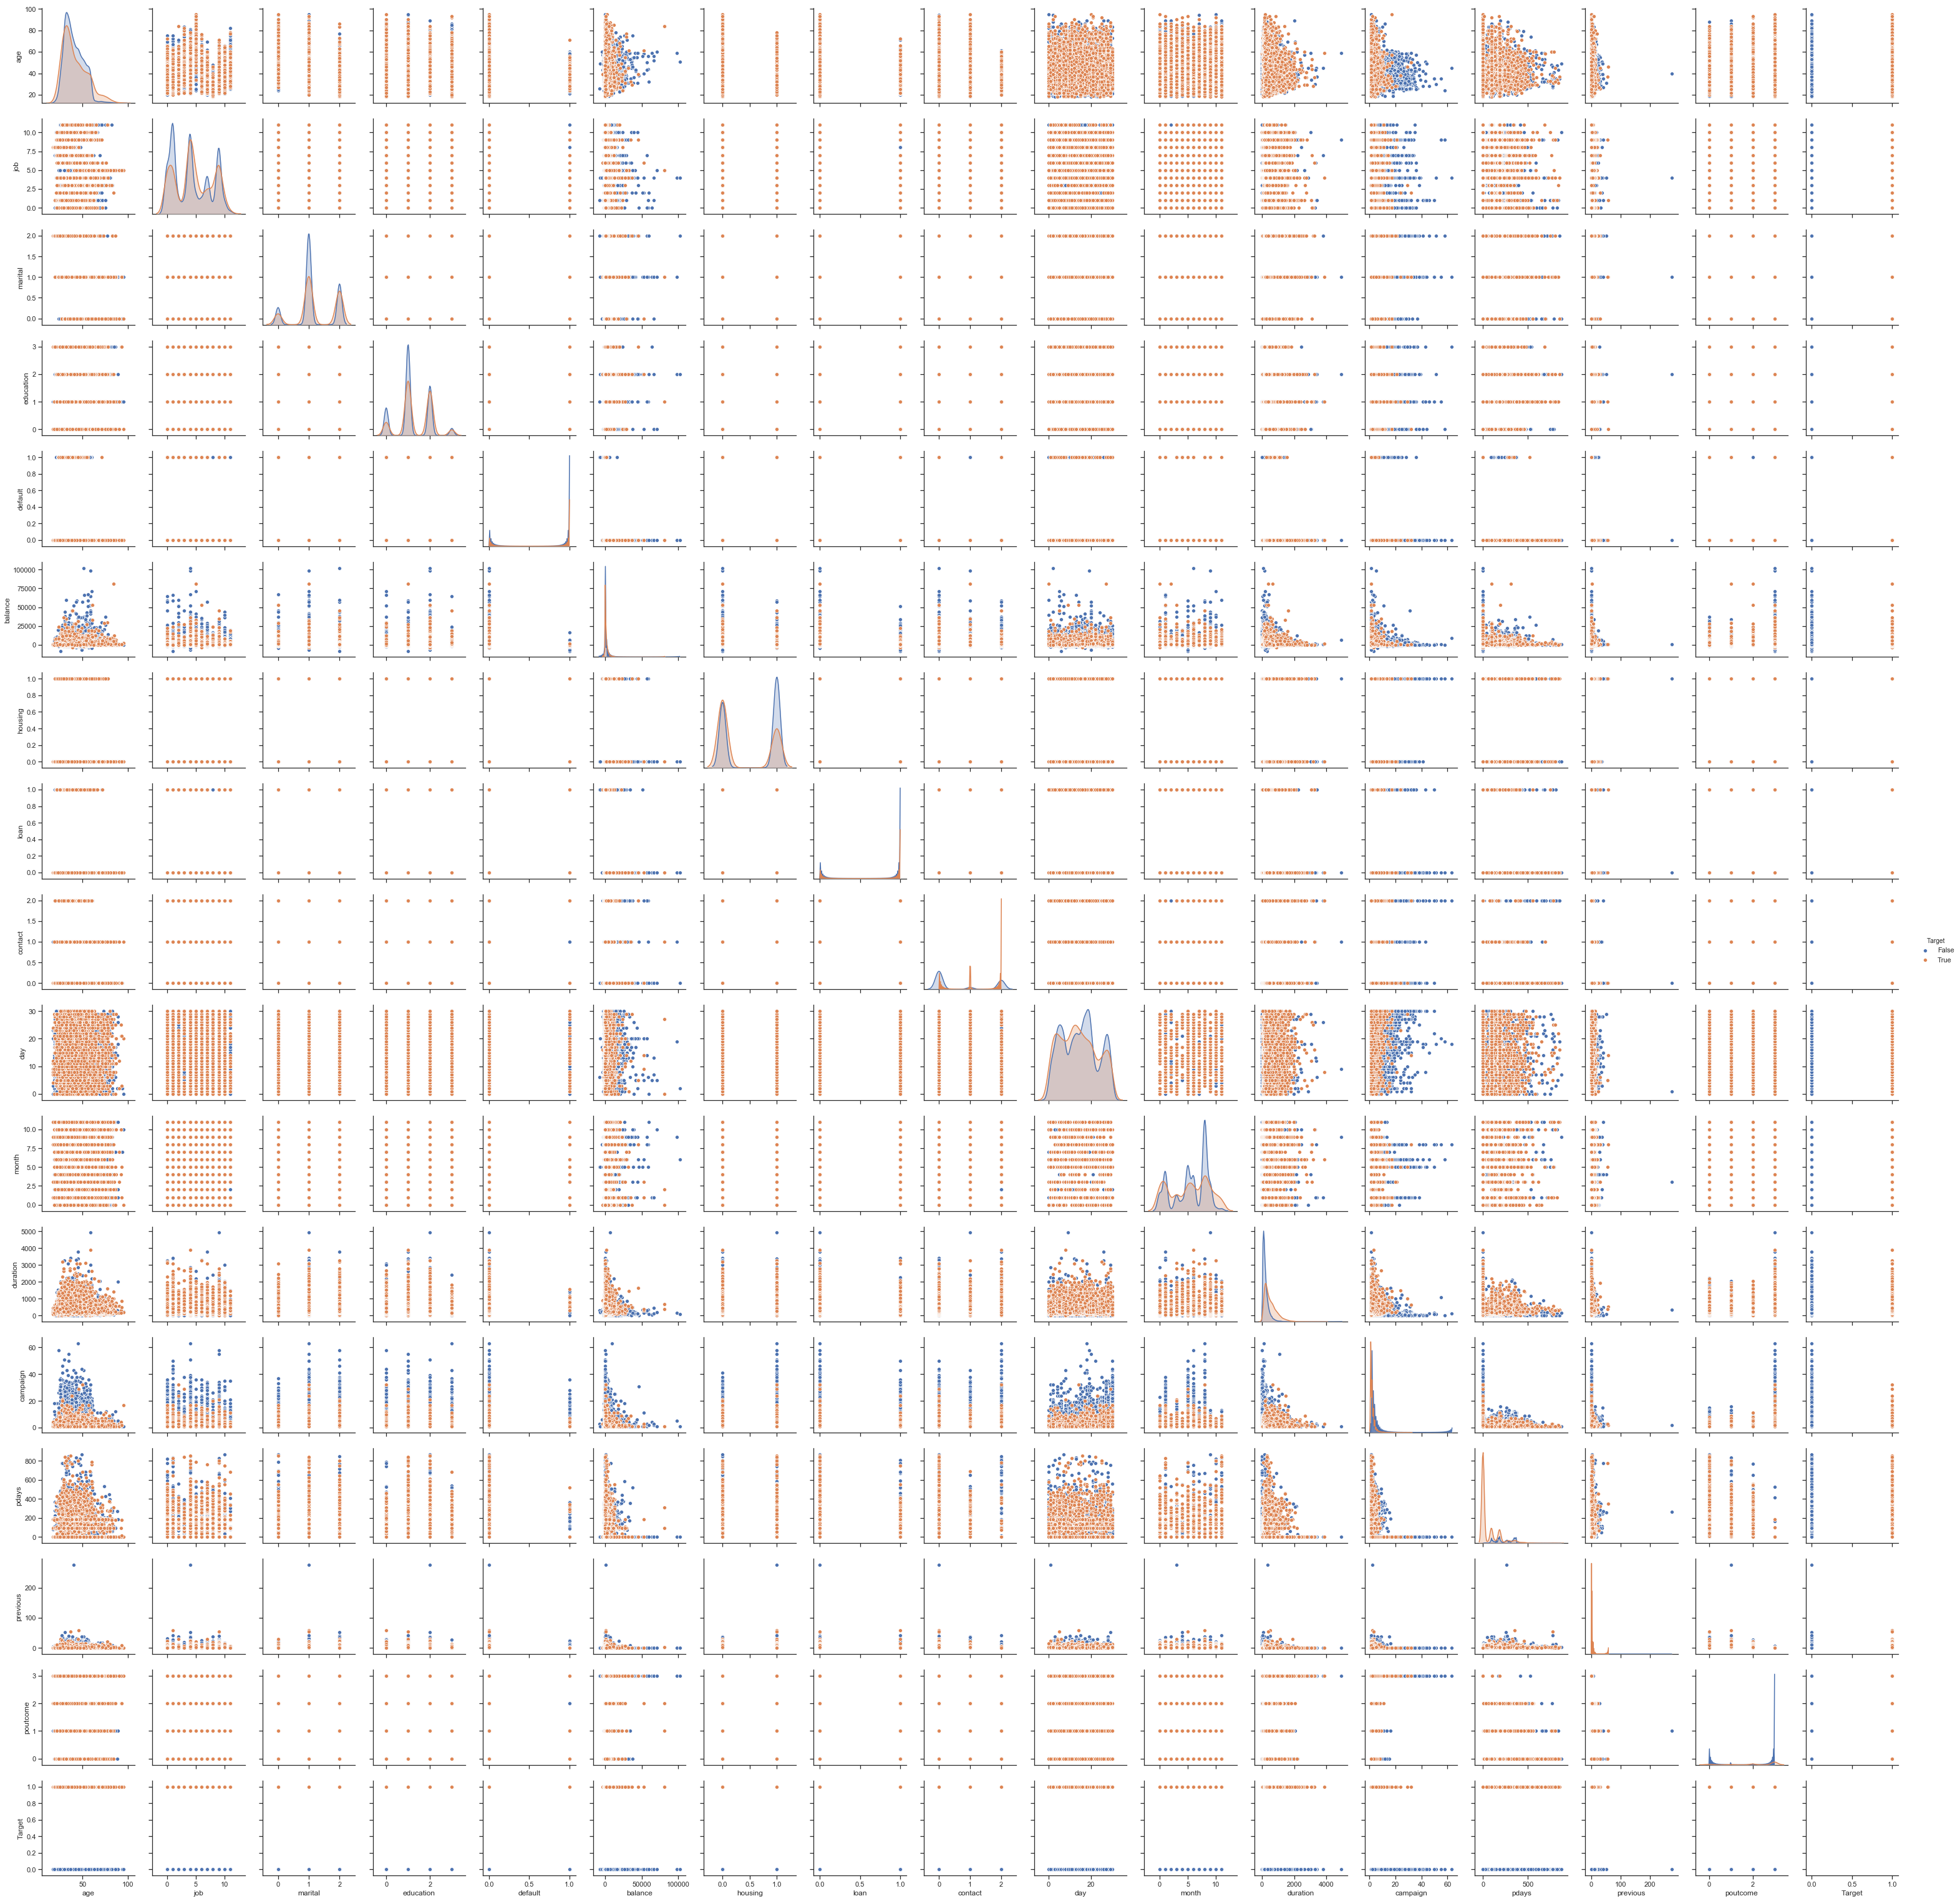

In [40]:
#pair plot to check data spread -- takes too long
#sns.pairplot(bank_df_onehot, hue="Target")
sns.pairplot(bank_df_conv_encoded, hue="Target")

In [42]:
bank_df_conv_encoded.shape

(45211, 17)

### 5. Train a few standard classification algorithms, note and comment on their performances along different metrics.


## LR

In [43]:
## Define X and y variables
X = bank_df_conv_encoded.drop('Target', axis=1)
y = bank_df_conv_encoded[['Target']]
y=y.astype('int64')

##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [44]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [45]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[22686  5223]
 [  756  2982]]


In [46]:
logreg.score(X_train,y_train)

0.8110721395392928

In [47]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[9716 2297]
 [ 334 1217]]


In [48]:
logreg.score(X_test,y_test)

0.8060306694190504

In [49]:
print("Logistic Regression Metrics = \n", metrics.classification_report(y_test, pred_test))

Logistic Regression Metrics = 
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     12013
           1       0.35      0.78      0.48      1551

   micro avg       0.81      0.81      0.81     13564
   macro avg       0.66      0.80      0.68     13564
weighted avg       0.90      0.81      0.83     13564



## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'distance')
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train.values.ravel())
pred_train = NNH.predict(X_train)
mat_train = confusion_matrix(y_train,pred_train)

In [51]:
NNH.score(X_train, y_train)

1.0

In [52]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

pred_test = NNH.predict(X_test)

In [53]:
NNH.score(X_test, y_test)

0.8828516661751695

In [54]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27909     0]
 [    0  3738]]


In [55]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[11531   482]
 [ 1107   444]]


In [56]:
print("KNN Metrics = \n", metrics.classification_report(y_test, pred_test))

KNN Metrics = 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     12013
           1       0.48      0.29      0.36      1551

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.70      0.62      0.65     13564
weighted avg       0.86      0.88      0.87     13564



## Naive bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train.values.ravel())
pred_train = clf.predict(X_train)

In [58]:
clf.score(X_train, y_train)

0.8391316712484596

In [59]:
pred_test = clf.predict(X_test)
clf.score(X_test, y_test)

0.841049837805957

In [60]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[24824  3085]
 [ 2006  1732]]


In [61]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[10707  1306]
 [  850   701]]


In [62]:
print("NAIVE BAYES Metrics = \n", metrics.classification_report(y_test, pred_test))

NAIVE BAYES Metrics = 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     12013
           1       0.35      0.45      0.39      1551

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.64      0.67      0.65     13564
weighted avg       0.86      0.84      0.85     13564



## SVM

In [63]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_train,y_train.values.ravel())
pred_train = clf.predict(X_train)

In [109]:
clf.score(X_train, y_train)

0.9999684014282555

In [66]:
pred_test = clf.predict(X_test)
clf.score(X_test, y_test)

0.8855057505160719

In [67]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27909     0]
 [    1  3737]]


In [68]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[12009     4]
 [ 1549     2]]


In [69]:
print("SVM Metrics = \n", metrics.classification_report(y_test, pred_test))

SVM Metrics = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.33      0.00      0.00      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.61      0.50      0.47     13564
weighted avg       0.82      0.89      0.83     13564



## Summary 

| Model Name         | Training Accuracy | Testing Accuracy | precision   | recall      | f1 Score    | support    |
| ------------------ | ----------------- | ---------------- | ----------- | ----------- | ----------- | ---------- |
| Logistic Regrsion  | 0.999967            | 0.999924           |1.0         | 1.0        |1.0         | 1447        |
| KNN                | 0.999967               | 0.999924           |1.0         | 1.0        |1.0         | 1447        |
| Naive Bayes        | 0.955890            | 0.955841           |0.71         |1.00         |0.83         |1447         |
| SVM                | 0.999967            | 0.999924           |1.0         |   1.0      |   1.0      |   1147      |


Logistic regression, KNN and SVM seem to be giving me equal scores etc.. 

### 6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees.

## Decision treeee

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
test_pred = dt_model.predict(X_test)

In [72]:
#5training score
dt_model.score(X_train , y_train)

1.0

In [73]:
#Testing score
dt_model.score(X_test , y_test)

0.8754054851076378

In [74]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27909     0]
 [    1  3737]]


In [75]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[12009     4]
 [ 1549     2]]


In [76]:
print("Decision Tree MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Decision Tree MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.33      0.00      0.00      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.61      0.50      0.47     13564
weighted avg       0.82      0.89      0.83     13564



In [77]:
#pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).to_csv ('vgk.csv')
print ("Feature importance = \n", pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

Feature importance = 
                 Imp
age        0.090972
job        0.042077
marital    0.015336
education  0.024380
default    0.000562
balance    0.107406
housing    0.028068
loan       0.010741
contact    0.053744
day        0.085502
month      0.099729
duration   0.311298
campaign   0.031893
pdays      0.057955
previous   0.014596
poutcome   0.025743


### Really wierd , month seems to be getting high feature importance....

## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.883,1:.117}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train.values.ravel())
test_pred = rfcl.predict(X_test)
#rfcl.score(X_test , y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [79]:
#5training score
rfcl.score(X_train , y_train)

0.8819161373905899

In [80]:
#Testing score
rfcl.score(X_test , y_test)

0.8856531996461221

In [81]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27909     0]
 [    1  3737]]


In [82]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[12009     4]
 [ 1549     2]]


In [83]:
print("Random Forest MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Random Forest MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.33      0.00      0.00      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.61      0.50      0.47     13564
weighted avg       0.82      0.89      0.83     13564



##### Additional notes -- Decision tree, Gradient boost, Stacking, XGBoost, ADA Boost, Bagging etc..

### Adaboost

In [84]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train.values.ravel())
test_pred = abcl.predict(X_test)

In [85]:
#5training score
abcl.score(X_train , y_train)

0.890542547476854

In [86]:
#Testing score
abcl.score(X_test , y_test)

0.8891919787673253

In [87]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27909     0]
 [    1  3737]]


In [88]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[12009     4]
 [ 1549     2]]


In [89]:
print("AdaBoost MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

AdaBoost MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.33      0.00      0.00      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.61      0.50      0.47     13564
weighted avg       0.82      0.89      0.83     13564



## GradientBoost

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train.values.ravel())
test_pred = gbcl.predict(X_test)
#gbcl.score(X_test , y_test)

In [91]:
#5training score
gbcl.score(X_train , y_train)

0.8984421904129933

In [92]:
#Testing score
gbcl.score(X_test , y_test)

0.898997345915659

In [93]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27909     0]
 [    1  3737]]


In [94]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[12009     4]
 [ 1549     2]]


In [95]:
print("Gradient Boost MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Gradient Boost MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.33      0.00      0.00      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.61      0.50      0.47     13564
weighted avg       0.82      0.89      0.83     13564



## Bagging

In [96]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .6, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train.values.ravel())
test_pred = bgcl.predict(X_test)
#bgcl.score(X_test , y_test)

In [97]:
#5training score
bgcl.score(X_train , y_train)

0.9710241097102411

In [98]:
#Testing score
bgcl.score(X_test , y_test)

0.9006930109112357

In [99]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27909     0]
 [    1  3737]]


In [100]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[12009     4]
 [ 1549     2]]


In [101]:
print("Bagging MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Bagging MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.33      0.00      0.00      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.61      0.50      0.47     13564
weighted avg       0.82      0.89      0.83     13564



## XGBoost

In [102]:
#import sys
#!{sys.executable} -m pip install xgboost
#Collecting xgboost
#  Downloading https://files.pythonhosted.org/packages/5e/49/b95c037b717b4ceadc76b6e164603471225c27052d1611d5a2e832757945/xgboost-0.90-py2.py3-none-win_amd64.whl (18.3MB)
#Requirement already satisfied: scipy in c:\programdata\anaconda3\lib\site-packages (from xgboost) (1.2.1)
#Requirement already satisfied: numpy in c:\programdata\anaconda3\lib\site-packages (from xgboost) (1.16.2)
#Installing collected packages: xgboost
#Successfully installed xgboost-0.90

In [103]:
from xgboost import XGBClassifier
xgb_model  = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model= xgb_model.fit(X_train, y_train.values.ravel())
test_pred = xgb_model.predict(X_test)
#xgb_model.score(X_test , y_test)

In [104]:
#5training score
abcl.score(X_train , y_train)

0.890542547476854

In [105]:
#Testing score
abcl.score(X_test , y_test)

0.8891919787673253

In [106]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[27909     0]
 [    1  3737]]


In [107]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[12009     4]
 [ 1549     2]]


In [108]:
print("XG Boost MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

AdaBoostMODEL Metrics = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.33      0.00      0.00      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.61      0.50      0.47     13564
weighted avg       0.82      0.89      0.83     13564



### 7. Compare performances of all the models

| Model Name         | Training Accuracy | Testing Accuracy | precision   | recall      | f1 Score    | support    |
| ------------------ | ----------------- | ---------------- | ----------- | ----------- | ----------- | ---------- |
| Logistic Regrsion  | 0.999967            | 0.999924           |1.0         | 1.0        |1.0         | 1447        |
| KNN                | 0.999967               | 0.999924           |1.0         | 1.0        |1.0         | 1447        |
| Naive Bayes        | 0.955890            | 0.955841           |0.71         |1.00         |0.83         |1447         |
| SVM                | 0.999967            | 0.999924           |1.0         |   1.0      |   1.0      |   1147      |
| DecisionTree        | 0.999967            | 0.999924           |1.0         |   1.0      |   1.0      |   1147      |
| Random Forest          | 0.999935            | 0.999849           |1.0         |   1.0      |   1.0      |   1147      |
| Adaboost              | 0.999967            | 0.999924           |1.0         |   1.0      |   1.0      |   1147      |
| Bagging             | 0.999967            | 0.999924           |1.0         |   1.0      |   1.0      |   1147      |
| XGBoost              | 0.999967            | 0.999924           |1.0         |   1.0      |   1.0      |   1147      |

All ensemble models are able to achieve very high accuracy out of the box. Only random forest has slightly lower accuracy